In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [5]:
#Read the data
car = pd.read_csv("ToyotaCorolla.csv",encoding = 'unicode_escape')
car.head(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
data = car[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:
data.isnull().sum()
#nonull

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [10]:
data.corr()
#correlation

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x19ab168a910>,
 'caps': [<matplotlib.lines.Line2D at 0x19ab1698220>,
 'boxes': [<matplotlib.lines.Line2D at 0x19ab16ae790>],
 'medians': [<matplotlib.lines.Line2D at 0x19ab168d5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ab168d9d0>],
 'means': []}

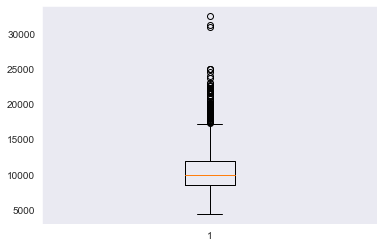

In [14]:
plt.boxplot(data["Price"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19ab13f1250>,
 'caps': [<matplotlib.lines.Line2D at 0x19ab13f1d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x19ab13f1fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x19ab13f7d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ab13f73d0>],
 'means': []}

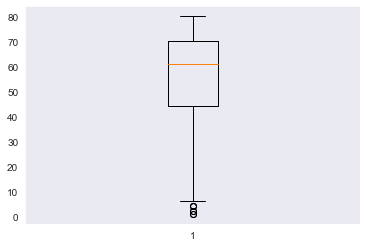

In [15]:
plt.boxplot(data["Age_08_04"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19ab105cd00>,
 'caps': [<matplotlib.lines.Line2D at 0x19ab104efa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19ab105ceb0>],
 'medians': [<matplotlib.lines.Line2D at 0x19ab14897f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ab14a86a0>],
 'means': []}

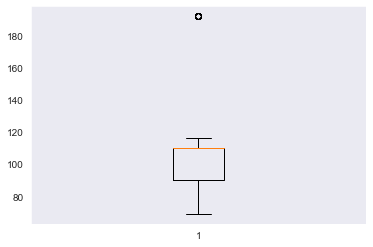

In [17]:
plt.boxplot(data["HP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19ab109df40>,
 'caps': [<matplotlib.lines.Line2D at 0x19ab10ac4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19ab109d7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x19ab10ae9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ab10ae520>],
 'means': []}

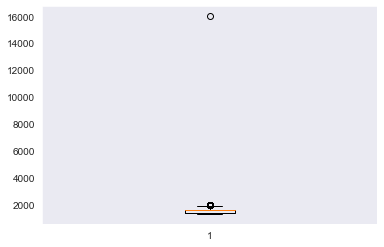

In [18]:
plt.boxplot(data["cc"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19ab12bcca0>,
 'caps': [<matplotlib.lines.Line2D at 0x19ab13023a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19ab12bc9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x19ab1302a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ab1302d60>],
 'means': []}

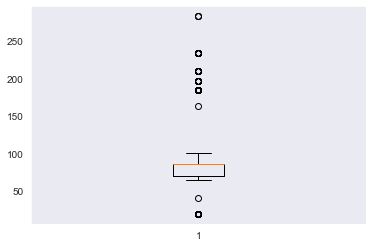

In [19]:
plt.boxplot(data["Quarterly_Tax"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19ab1395160>,
 'caps': [<matplotlib.lines.Line2D at 0x19ab1395820>,
 'boxes': [<matplotlib.lines.Line2D at 0x19ab1351dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x19ab1395ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ab139e220>],
 'means': []}

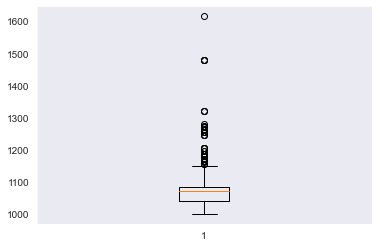

In [20]:
plt.boxplot(data["Weight"])

In [47]:
#model
import statsmodels.formula.api as smf  
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= data).fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:56:22   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#cc and doors have high p value and they are significant
#so lest build individual model with price and cc= model1 and doors and price = model2  
#finally model3 =  combined 


In [50]:
## building on individual model
model1 = smf.ols("Price~cc",data= data).fit()
model1.summary()
## cc is significant
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     40.15
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           3.15e-10
Time:                        15:56:27   Log-Likelihood:                -13775.
No. Observations:                1435   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5722.1559    795.194      7.196      0.000    4162.287    7282.025
cc             3.1931      0.504      6.336      0.000       2.205       4.182
==============================================================================
Omnibus:                      410.619   Durbin-Watson:                   0.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1077.826
Skew:                           1.505   Prob(JB):                    8.97e-235
Kurtosis:                       5.995   Cond. No.                     1.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
## building on individual model
model2 = smf.ols("Price~Doors",data= data).fit()
model2.summary()
## door is significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     50.28
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           2.08e-12
Time:                        15:56:29   Log-Likelihood:                -13770.
No. Observations:                1435   AIC:                         2.754e+04
Df Residuals:                    1433   BIC:                         2.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7902.3435    409.024     19.320      0.000    7099.994    8704.693
Doors        699.9570     98.710      7.091      0.000     506.325     893.589
==============================================================================
Omnibus:                      469.140   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1425.301
Skew:                           1.657   Prob(JB):                    3.16e-310
Kurtosis:                       6.585   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
model3 = smf.ols("Price~cc+Doors",data= data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     41.13
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           4.28e-18
Time:                        15:56:29   Log-Likelihood:                -13755.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3816.0496    838.929      4.549      0.000    2170.389    5461.710
cc             2.7866      0.501      5.561      0.000       1.804       3.770
Doors        630.5679     98.489      6.402      0.000     437.370     823.766
==============================================================================
Omnibus:                      399.786   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1027.799
Skew:                           1.474   Prob(JB):                    6.55e-224
Kurtosis:                       5.916   Cond. No.                     1.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

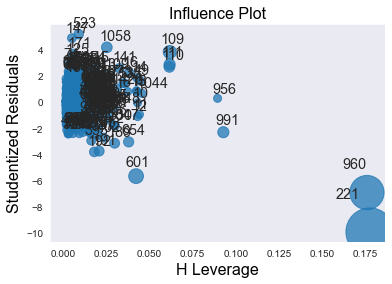

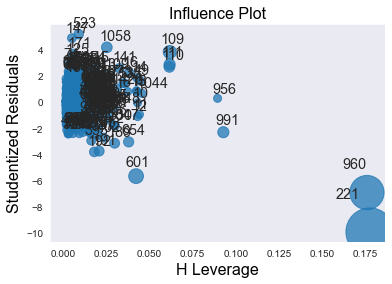

In [53]:
##plotting the influence plot
import statsmodels.api as sm
sm.graphics.influence_plot(model)

In [54]:
#lets remove the observation = 80
data1 = data.drop(data.index[[80]],axis=0)

In [55]:
#lets build model again
modelA = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= data1).fit()

In [56]:
modelA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1183.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:56:50   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6281.3154   1382.716     -4.543      0.000   -8993.693   -3568.938
Age_08_04      -120.4096      2.562    -46.998      0.000    -125.435    -115.384
KM               -0.0178      0.001    -13.954      0.000      -0.020      -0.015
HP               39.3549      2.911     13.519      0.000      33.644      45.065
cc               -2.5267      0.307     -8.224      0.000      -3.129      -1.924
Doors           -28.0419     39.248     -0.714      0.475    -105.032      48.949
Gears           523.9417    192.860      2.717      0.007     145.621     902.262
Quarterly_Tax     9.0568      1.425      6.356      0.000       6.262      11.852
Weight           20.1625      1.116     18.073      0.000      17.974      22.351
==============================================================================
Omnibus:                      246.389   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2708.190
Skew:                          -0.441   Prob(JB):                         0.00
Kurtosis:                       9.675   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
#lets remove the next influencing observation 960 and 221
data2 = data1.drop(data.index[[960,221]],axis=0)

In [58]:
modelB = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= data2).fit()
modelB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1184.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:56:51   Log-Likelihood:                -12308.
No. Observations:                1432   AIC:                         2.463e+04
Df Residuals:                    1423   BIC:                         2.468e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6260.9495   1382.419     -4.529      0.000   -8972.748   -3549.151
Age_08_04      -120.4142      2.563    -46.985      0.000    -125.442    -115.387
KM               -0.0178      0.001    -13.968      0.000      -0.020      -0.015
HP               39.4247      2.911     13.545      0.000      33.715      45.134
cc               -2.5209      0.307     -8.207      0.000      -3.123      -1.918
Doors           -25.5917     39.265     -0.652      0.515    -102.615      51.431
Gears           523.2874    192.797      2.714      0.007     145.090     901.485
Quarterly_Tax     9.0727      1.424      6.370      0.000       6.279      11.867
Weight           20.1244      1.116     18.040      0.000      17.936      22.313
==============================================================================
Omnibus:                      245.672   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2695.301
Skew:                          -0.440   Prob(JB):                         0.00
Kurtosis:                       9.663   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
#modelA is improved so it is considered to the final model (after removing influncers)